Association Rules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.patches import Patch
import csv

# Mlxtend library
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

# pyECLAT library
from pyECLAT import ECLAT

customer_basket = pd.read_csv('customer_basket.csv')

reader = [eval(item) if isinstance(item, str) else item 
          for item in customer_basket['list_of_goods']]

In [2]:
te = TransactionEncoder()
te_fit = te.fit(reader).transform(reader)
transactions_items = pd.DataFrame(te_fit, columns=te.columns_)

In [3]:
frequent_itemsets_grocery = apriori(
    transactions_items, min_support=0.05, use_colnames=True
    )

In [4]:
frequent_itemsets_grocery.sort_values(by='support', ascending=False)

,support,itemsets
43,0.34900,(oil)
17,0.25052,(cooking oil)
3,0.18067,(babies food)
1,0.15952,(asparagus)
8,0.15134,(cake)
...,...,...
56,0.05175,(strong cheese)
47,0.05157,(pokemon sword)
76,0.05071,"(oil, chicken)"
53,0.05018,(samsung galaxy 10)


In [5]:
rules_grocery = association_rules(frequent_itemsets_grocery,
                                  metric="confidence",
                                  min_threshold=0.2)

In [6]:
frequent_itemsets_grocery_iter_2 = apriori(
    transactions_items, min_support=0.02, use_colnames=True
    )

# We'll use a confidence level of 20%
rules_grocery_iter_2 = association_rules(frequent_itemsets_grocery_iter_2,
                                  metric="confidence",
                                  min_threshold=0.2)

In [7]:
rules = rules_grocery_iter_2[['antecedents','consequents', 'support','confidence','lift']]

In [8]:
rules.head(10)

,antecedents,consequents,support,confidence,lift
0,(airpods),(energy drink),0.02357,0.323986,3.789313
1,(energy drink),(airpods),0.02357,0.275673,3.789313
2,(asparagus),(carrots),0.05928,0.371615,3.361205
3,(carrots),(asparagus),0.05928,0.536179,3.361205
4,(cauliflower),(asparagus),0.02146,0.434413,2.723251
5,(frozen vegetables),(asparagus),0.02400,0.375587,2.354481
6,(asparagus),(mashed potato),0.03567,0.223608,2.746694
7,(mashed potato),(asparagus),0.03567,0.438153,2.746694
8,(melons),(asparagus),0.02685,0.460075,2.884124
9,(asparagus),(oil),0.03792,0.237713,0.681126


ECLAT METHOD

In [9]:
eclat_groceries = ECLAT(data=pd.DataFrame(reader))

In [10]:
groceries_rules_indexes, groceries_rules_supports = eclat_groceries.fit(min_support=0.02,
                                           min_combination=2,
                                           max_combination=2)

Combination 2 by 2


13203it [00:36, 359.48it/s]


In [11]:
rules_eclat_groceries = pd.DataFrame(
  list(groceries_rules_supports.values()),
  index=list(groceries_rules_supports.keys()),
  columns=['support']
)

rules_eclat_groceries.sort_values(by='support', ascending=False).head(10)

,support
cooking oil & oil,0.14461
oil & cake,0.10709
oil & candy bars,0.08261
ratchet & clank & babies food,0.08237
tomatoes & asparagus,0.07989
tea & oil,0.07785
barbecue sauce & oil,0.07766
cooking oil & cake,0.07009
oil & cologne,0.06737
cooking oil & babies food,0.06728


In [12]:
#APRIORI METHOD 

def apriori_rules(customer_basket):

    reader = [eval(item) if isinstance(item, str) else item 
          for item in customer_basket['list_of_goods']]
    
    te = TransactionEncoder()
    te_fit = te.fit(reader).transform(reader)
    transactions_items = pd.DataFrame(te_fit, columns=te.columns_)

    #frequent_itemsets_grocery = apriori(
    #transactions_items, min_support=0.05, use_colnames=True)

    #rules_grocery = association_rules(frequent_itemsets_grocery,
    #                              metric="confidence",
     #                             min_threshold=0.2)
    
    frequent_itemsets_grocery_iter_2 = apriori(
    transactions_items, min_support=0.02, use_colnames=True)

    rules_grocery_iter_2 = association_rules(frequent_itemsets_grocery_iter_2,
                                  metric="confidence",
                                  min_threshold=0.2)

    rules = rules_grocery_iter_2[['antecedents','consequents', 'support','confidence','lift']]#.sort_values(by='support', ascending=False)

    return rules

In [13]:
customer_info_with_clusters = pd.read_csv('customer_info_with_clusters.csv')

In [14]:
customer_info_with_clusters.groupby('kmeans_cluster').mean()

/var/folders/yj/p6trxhdn1dq3xs35wd17nbzr0000gn/T/ipykernel_17669/2608278151.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customer_info_with_clusters.groupby('kmeans_cluster').mean()


,customer_id,customer_gender,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,...,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,customer_age,years_active,hierarchical_cluster
kmeans_cluster,,,,,,,,,,,,,,,,,,,,,
0,19933.279070,0.506426,0.261750,0.291677,0.930110,1.383354,22310.504896,10951.910343,15.622338,215.553733,...,301.010404,116.240514,28.268296,2017.074663,0.466646,38.747990,-9.169565,56.369829,7.925337,5.402387
1,20080.127576,0.500596,1.116982,0.967331,1.292216,3.086595,10395.071368,696.361778,10.248578,352.541373,...,284.339295,56.308636,61.408124,2016.193153,0.676035,38.747551,-9.157054,46.586578,8.806847,5.401805
2,20016.009688,0.505904,0.532667,0.978020,0.094217,2.094338,61741.370875,5111.868604,14.596549,1112.200606,...,388.746594,145.952770,12.143143,2013.755677,0.784741,38.751697,-9.146193,56.468544,11.244323,1.078111
3,20156.174455,0.482016,0.971283,0.815180,0.955763,3.136449,29402.962334,3788.094024,13.616086,381.772812,...,331.442368,232.067969,39.564531,2013.629850,0.684509,38.747704,-9.157148,56.681677,11.370150,2.864344
4,20290.780825,0.489250,0.997236,0.305309,0.720711,3.160816,10569.032909,1983.223344,13.884247,1994.907108,...,246.303642,80.420140,10.389281,2014.636244,0.601141,38.747593,-9.156571,56.168100,10.363756,6.982668
5,19749.041766,0.498210,2.867243,1.892124,0.793258,3.010680,20060.718079,5001.277446,10.210740,845.321301,...,218.545943,302.527148,19.799576,2012.893795,0.698389,38.747975,-9.156462,56.685740,12.106205,0.186456
6,19832.822846,0.498225,2.494547,1.753082,0.690545,2.923201,20294.487899,5007.647951,10.406647,854.695966,...,527.686028,263.260084,18.718427,2013.093901,0.722491,38.748527,-9.154791,56.904808,11.906099,0.396902
7,19965.480278,0.498896,1.101294,1.013380,0.975891,3.837236,30891.145787,3216.740928,13.213127,336.683875,...,350.086463,251.277690,40.236152,2012.196276,0.828021,38.747227,-9.156260,56.071253,12.803724,2.073209
8,20025.496896,0.496009,0.459533,0.791901,0.700148,3.512563,10709.621638,788.488324,18.690984,407.175998,...,284.482708,50.794561,62.567048,2016.267810,0.742536,38.744977,-9.157626,51.739994,8.732190,4.007981


In [15]:
customer_info_with_clusters

,customer_id,customer_name,customer_gender,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,...,year_first_transaction,loyalty_card_number,latitude,longitude,customer_age,years_active,customer_educlevel,kmeans_cluster,som_cluster,hierarchical_cluster
0,29930.0,April Clark,1.0,2.0,2.0,1.0,4.0,7789.0,5601.0,13.0,...,2018.0,0.0,38.721807,-9.125534,53.0,7.0,NaN,6,"(1, 0)",0
1,6813.0,Paul Ketchum,0.0,0.0,1.0,0.0,4.0,8653.0,35.0,14.0,...,2013.0,1.0,38.734668,-9.163533,81.0,12.0,Bsc.,1,"(1, 2)",4
2,39451.0,Mary Downing,1.0,2.0,3.0,0.0,7.0,15605.0,4275.0,14.0,...,2011.0,0.0,38.787126,-9.147077,36.0,14.0,NaN,5,"(1, 0)",0
3,21557.0,Manuel Kueny,0.0,0.0,0.0,1.0,1.0,13440.0,16366.0,14.0,...,2009.0,0.0,38.741816,-9.159700,49.0,16.0,NaN,0,"(0, 1)",8
4,16415.0,Curtis Tharp,0.0,1.0,1.0,1.0,5.0,49250.0,3197.0,14.0,...,2012.0,1.0,38.785921,-9.149221,59.0,13.0,Phd.,3,"(1, 1)",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33529,37071.0,Mary Diaz,1.0,1.0,1.0,0.0,2.0,62321.0,5250.0,16.0,...,2018.0,0.0,38.750813,-9.103808,26.0,7.0,NaN,2,"(0, 0)",1
33530,27422.0,John Gross,0.0,1.0,1.0,0.0,3.0,16084.0,3796.0,13.0,...,2019.0,1.0,38.745020,-9.169168,41.0,6.0,NaN,3,"(1, 1)",3
33531,39540.0,Kathleen Harper,1.0,1.0,0.0,1.0,2.0,14631.0,8784.0,17.0,...,2018.0,0.0,38.767834,-9.172368,25.0,7.0,NaN,0,"(0, 1)",8
33532,18367.0,Jenny Landry,1.0,1.0,1.0,1.0,4.0,37420.0,4702.0,9.0,...,2015.0,1.0,38.732462,-9.156155,64.0,10.0,Msc.,3,"(1, 1)",3


In [16]:
merged_df = pd.merge(customer_basket, customer_info_with_clusters, on='customer_id', how='inner')

In [17]:
merged_df.drop(columns=['som_cluster','hierarchical_cluster'], inplace=True)

In [18]:
def define_clusters(merged_df, cluster_number):
    cluster = merged_df[merged_df['kmeans_cluster'] == cluster_number] 
    return cluster

In [19]:
cluster_0 = define_clusters(merged_df, 0)
apriori_rules(cluster_0)

,antecedents,consequents,support,confidence,lift
0,(beer),(airpods),0.034643,0.262190,0.887846
1,(black beer),(airpods),0.031052,0.281340,0.952691
2,(bluetooth headphones),(airpods),0.031158,0.303811,1.028783
3,(bramble),(airpods),0.020807,0.257516,0.872019
4,(brownies),(airpods),0.033587,0.335797,1.137099
...,...,...,...,...,...
1500,"(pancakes, iphone 10, energy drink)","(protein bar, gadget for tiktok streaming)",0.021229,0.215434,1.551125
1501,"(iphone 10, energy drink, gadget for tiktok st...","(pancakes, protein bar)",0.021229,0.336120,1.516867
1502,"(iphone 10, pancakes, gadget for tiktok stream...","(energy drink, protein bar)",0.021229,0.484337,1.620391
1503,"(iphone 10, protein bar)","(pancakes, energy drink, gadget for tiktok str...",0.021229,0.229452,1.541840


In [20]:
cluster_1 = define_clusters(merged_df, 1)
apriori_rules(cluster_1)
    

,antecedents,consequents,support,confidence,lift
0,(airpods),(cooking oil),0.022777,0.551966,1.018243
1,(airpods),(oil),0.031065,0.752809,0.987079
2,(asparagus),(cake),0.076272,0.457580,1.094563
3,(asparagus),(candy bars),0.062073,0.372392,1.126645
4,(carrots),(asparagus),0.030138,0.302501,1.814798
...,...,...,...,...,...
1632,"(muffins, cooking oil, oil)","(cake, tea)",0.020807,0.278727,2.030034
1633,"(muffins, oil, cake)","(cooking oil, tea)",0.020807,0.354043,2.014067
1634,"(muffins, tea)","(cooking oil, oil, cake)",0.020807,0.267113,1.266841
1635,"(muffins, cooking oil)","(oil, cake, tea)",0.020807,0.237120,2.042572


In [21]:
cluster_2 = define_clusters(merged_df, 2)
apriori_rules(cluster_2).sort_values(by='lift', ascending=False)

,antecedents,consequents,support,confidence,lift
1948,"(spaghetti, fresh tuna, cottage cheese)","(champagne, frozen smoothie)",0.020241,0.369732,1.491914
1952,"(spaghetti, cottage cheese)","(champagne, fresh tuna, frozen smoothie)",0.020241,0.236520,1.486628
1945,"(champagne, spaghetti, cottage cheese)","(fresh tuna, frozen smoothie)",0.020241,0.271067,1.470209
1887,"(champagne, bluetooth headphones, frozen smoot...","(fresh tuna, cottage cheese)",0.025066,0.204974,1.469496
1946,"(champagne, spaghetti, frozen smoothie)","(fresh tuna, cottage cheese)",0.020241,0.204017,1.462633
...,...,...,...,...,...
913,(oil),"(champagne, fresh tuna)",0.020870,0.428879,0.912397
50,(beer),(champagne),0.028317,0.687023,0.878707
169,(oil),(champagne),0.033246,0.683190,0.873805
51,(beer),(fresh tuna),0.020346,0.493639,0.868261


In [22]:
cluster_3 = define_clusters(merged_df, 3)
apriori_rules(cluster_3).sort_values(by='lift', ascending=False)

,antecedents,consequents,support,confidence,lift
12,(babies food),(minecraft),0.026076,0.243292,5.399520
11,(minecraft),(babies food),0.026076,0.578723,5.399520
14,(ratchet & clank),(babies food),0.032787,0.570000,5.318131
15,(babies food),(ratchet & clank),0.032787,0.305903,5.318131
905,"(beer, cider)","(dessert wine, white wine)",0.022529,0.446768,5.224482
...,...,...,...,...,...
241,(spaghetti),(oil),0.030678,0.500000,0.939560
8,(asparagus),(oil),0.020132,0.486111,0.913462
13,(babies food),(oil),0.041127,0.383721,0.721058
9,(babies food),(barbecue sauce),0.023200,0.216458,0.631396


In [23]:
cluster_4 = define_clusters(merged_df, 4)
apriori_rules(cluster_4).sort_values(by='lift', ascending=False)

,antecedents,consequents,support,confidence,lift
2029,"(zucchini, carrots)","(asparagus, tomatoes, melons)",0.020935,0.208548,1.363228
1880,"(tomatoes, frozen vegetables, cauliflower)","(asparagus, carrots)",0.021601,0.529946,1.362458
2030,"(zucchini, melons)","(asparagus, carrots, tomatoes)",0.020935,0.448494,1.353292
2000,"(asparagus, shallot)","(carrots, tomatoes, mashed potato)",0.023006,0.243349,1.352628
1583,"(asparagus, shallot)","(tomatoes, frozen vegetables)",0.023524,0.248826,1.351943
...,...,...,...,...,...
293,(tea),(tomatoes),0.029590,0.736648,0.941656
18,(cooking oil),(asparagus),0.021675,0.602881,0.917970
275,(oil),(tomatoes),0.027667,0.708333,0.905461
178,(cooking oil),(tomatoes),0.025374,0.705761,0.902173


In [24]:
cluster_5 = define_clusters(merged_df, 5)
apriori_rules(cluster_5).sort_values(by='lift', ascending=False)

,antecedents,consequents,support,confidence,lift
131,(fresh tuna),(champagne),0.035072,0.602094,7.642324
130,(champagne),(fresh tuna),0.035072,0.445161,7.642324
95,(champagne),(bluetooth headphones),0.026837,0.340645,6.866653
96,(bluetooth headphones),(champagne),0.026837,0.540984,6.866653
133,(spaghetti),(champagne),0.022263,0.297151,3.771704
...,...,...,...,...,...
19,(cottage cheese),(babies food),0.034157,0.581315,0.799217
776,(spaghetti),"(ratchet & clank, babies food)",0.025516,0.340570,0.791071
245,(spaghetti),(minecraft),0.023279,0.310719,0.768749
298,(spaghetti),(ratchet & clank),0.029786,0.397558,0.758784


In [25]:
cluster_6 = define_clusters(merged_df, 6)
apriori_rules(cluster_6).sort_values(by='lift', ascending=False).head(20)

,antecedents,consequents,support,confidence,lift
1265,"(champagne, spaghetti)","(fresh tuna, bluetooth headphones)",0.022457,0.324409,5.130703
1268,"(fresh tuna, bluetooth headphones)","(champagne, spaghetti)",0.022457,0.355172,5.130703
1267,"(spaghetti, bluetooth headphones)","(champagne, fresh tuna)",0.022457,0.532300,5.049416
1266,"(champagne, fresh tuna)","(spaghetti, bluetooth headphones)",0.022457,0.213030,5.049416
1269,"(spaghetti, fresh tuna)","(champagne, bluetooth headphones)",0.022457,0.435518,4.842432
1264,"(champagne, bluetooth headphones)","(spaghetti, fresh tuna)",0.022457,0.249697,4.842432
1262,"(champagne, spaghetti, fresh tuna)",(bluetooth headphones),0.022457,0.528205,4.345494
687,(bluetooth headphones),"(champagne, cottage cheese)",0.024419,0.200897,4.336063
685,"(champagne, cottage cheese)",(bluetooth headphones),0.024419,0.527059,4.336063
296,(bluetooth headphones),"(champagne, avocado)",0.025946,0.213453,4.331866


In [26]:
cluster_7 = define_clusters(merged_df, 7)
apriori_rules(cluster_7).sort_values(by='lift', ascending=False).head(20)

,antecedents,consequents,support,confidence,lift
19,(babies food),(ratchet & clank),0.024314,0.259508,5.640601
18,(ratchet & clank),(babies food),0.024314,0.528474,5.640601
1732,"(oil, barbecue sauce, chicken)","(deodorant, cologne)",0.033641,0.229778,1.490512
1734,"(deodorant, cologne)","(oil, barbecue sauce, chicken)",0.033641,0.218219,1.490512
1369,"(barbecue sauce, green grapes)","(oil, cologne)",0.020960,0.507614,1.487152
1728,"(oil, deodorant, cologne)","(barbecue sauce, chicken)",0.033641,0.250781,1.483543
1716,"(cooking oil, oil, cologne)","(barbecue sauce, chicken)",0.020122,0.250326,1.480849
1719,"(cooking oil, cologne)","(oil, barbecue sauce, chicken)",0.020122,0.214286,1.463647
1733,"(oil, cologne, chicken)","(deodorant, barbecue sauce)",0.033641,0.293956,1.463187
1736,"(cologne, chicken)","(oil, deodorant, barbecue sauce)",0.033641,0.252358,1.454109


In [27]:
cluster_8 = define_clusters(merged_df, 8)
apriori_rules(cluster_8).sort_values(by='lift', ascending=False).head(20)

,antecedents,consequents,support,confidence,lift
370,"(salt, white wine)",(beer),0.038347,0.843537,5.351966
371,(beer),"(salt, white wine)",0.038347,0.243296,5.351966
348,"(salt, cider)",(beer),0.023193,0.833333,5.287225
367,(white wine),"(dessert wine, beer)",0.032265,0.244531,5.202188
362,"(dessert wine, beer)",(white wine),0.032265,0.686404,5.202188
358,"(dessert wine, salt)",(beer),0.020410,0.818182,5.191093
368,"(beer, white wine)",(salt),0.038347,0.441281,5.078136
373,(salt),"(beer, white wine)",0.038347,0.441281,5.078136
361,(salt),"(dessert wine, beer)",0.020410,0.234875,4.996769
357,"(dessert wine, beer)",(salt),0.020410,0.434211,4.996769


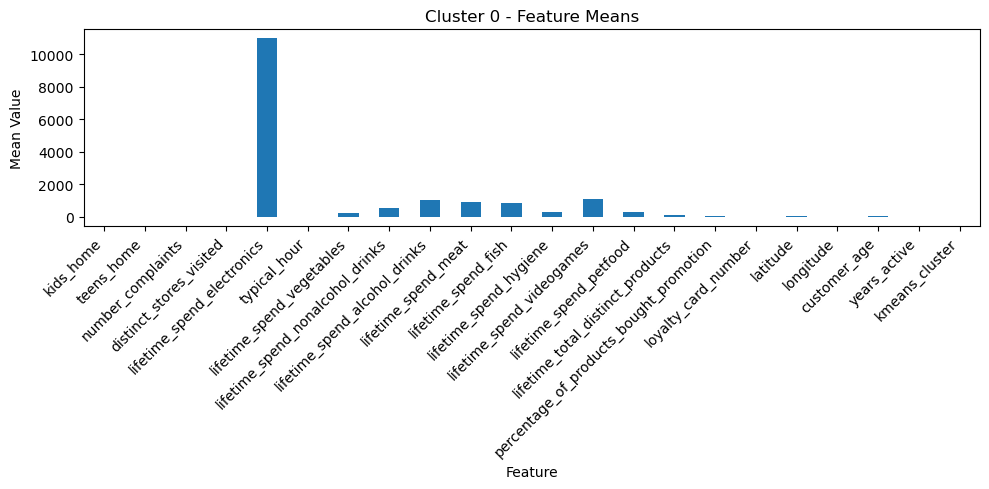

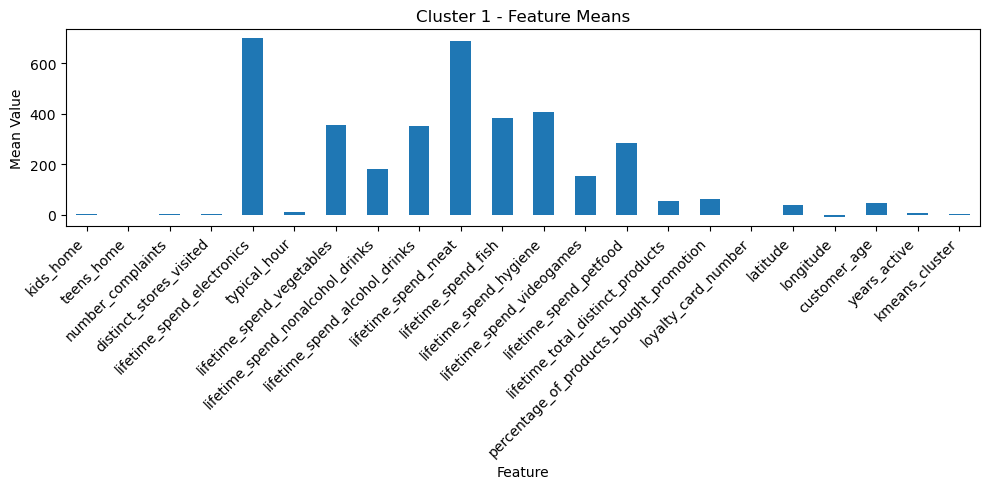

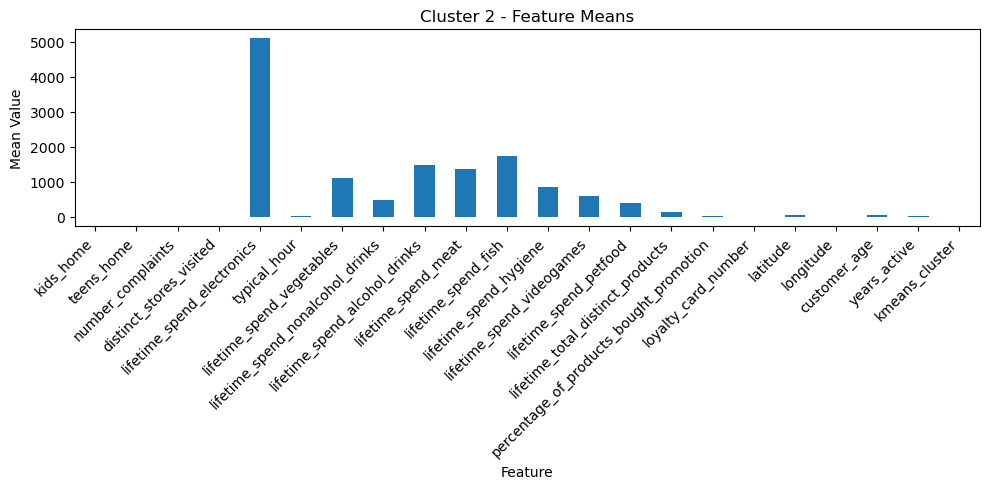

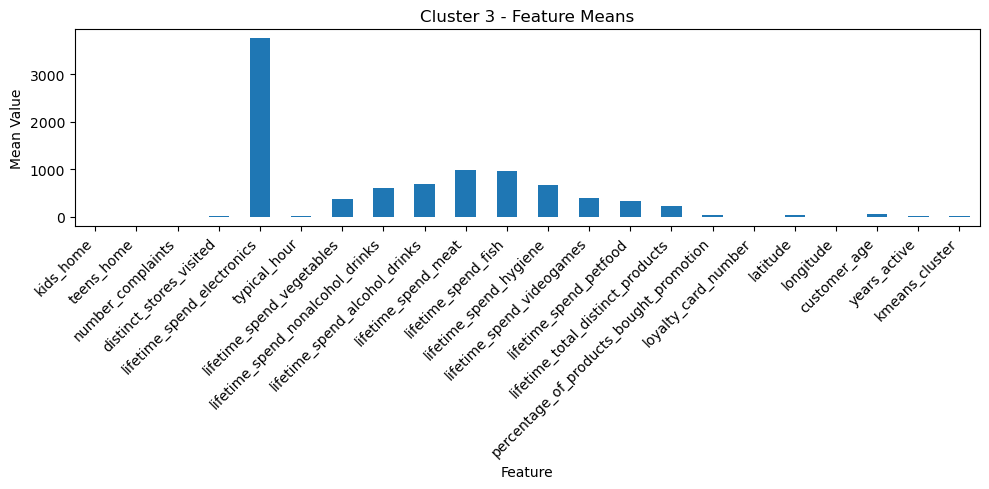

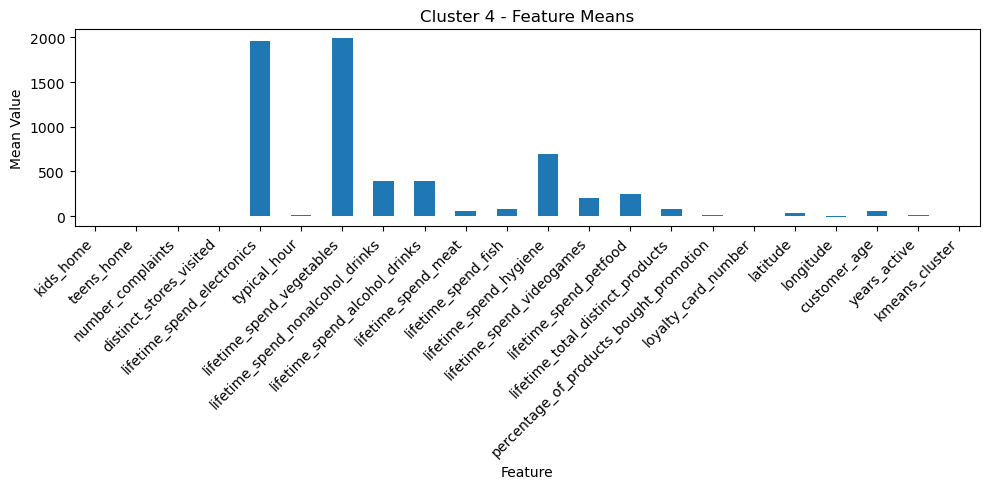

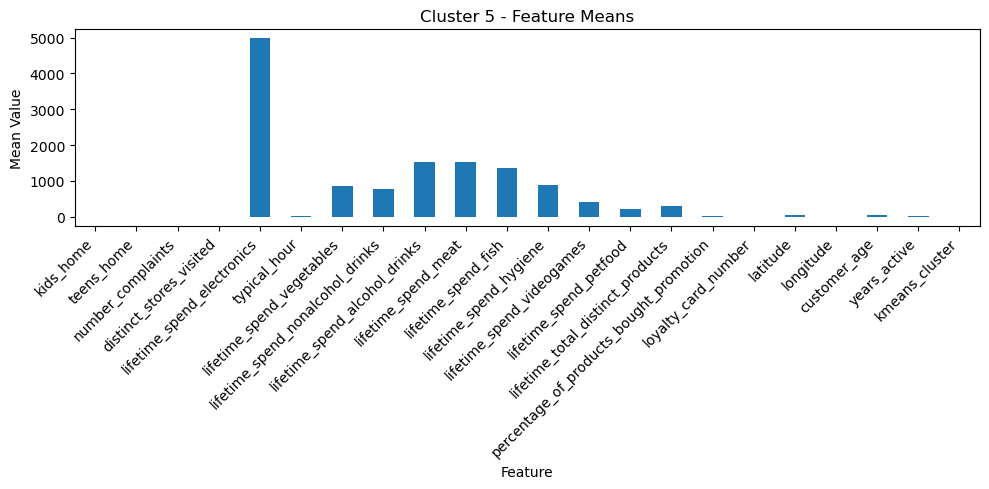

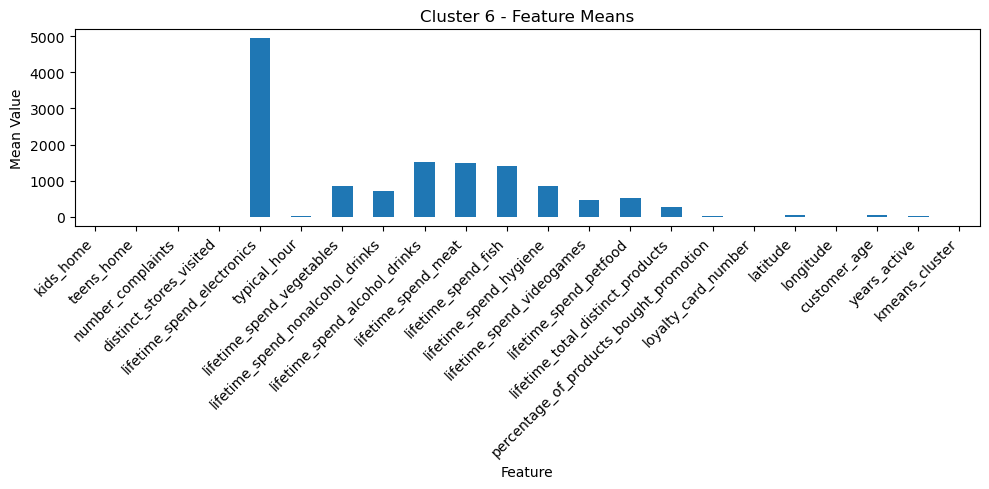

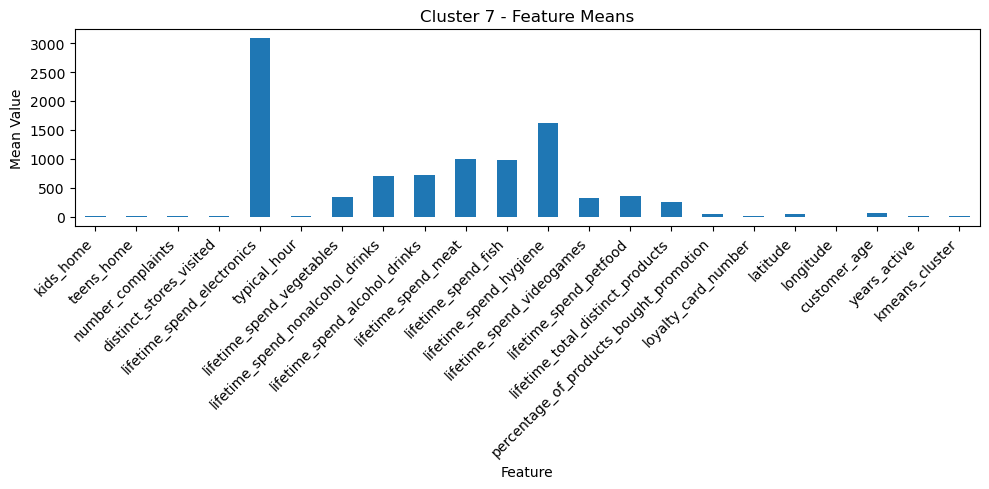

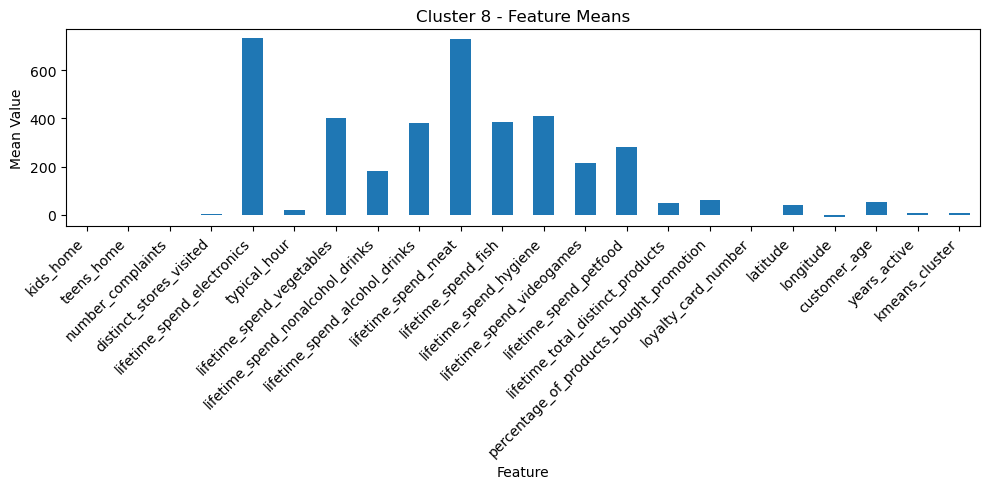

In [40]:
cluster_list = [cluster_0, cluster_1, cluster_2, cluster_3, cluster_4, cluster_5, cluster_6, cluster_7, cluster_8]

for i, cluster in enumerate(cluster_list):
    cluster.drop(
        columns=['customer_id', 'invoice_id', 'customer_gender', 'lifetime_spend_groceries', 'year_first_transaction']
    ).mean(numeric_only=True).plot(
        kind='bar', figsize=(10, 5), title=f'Cluster {i} - Feature Means'
    )
    
    plt.ylabel('Mean Value')
    plt.xlabel('Feature')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
